<a href="https://colab.research.google.com/github/cs167/notebook-5-niclacey/blob/main/Notebook5_Nicole%20Lacey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \#5: SVM, Perceptron, SGD, and PCA
**Due:** Tuesday 11/9, by 11:59pm

Name:

**Exercises**: \\
Build a **default model** for each of the following and then build a model with **one parameter tuned** (no need to include a graph, just change one parameter that hopefully results in a better model):
1. Support Vector Machines
2. Perceptron
3. Stochastic Gradient Descent
4. Run a PCA on the best model
5. Answer the conclusion questions


In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/Datasets/breast-cancer-wisconsin-data.csv')
data.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
#we need to drop the last column 'Unnamed: 32'
data.drop(labels='Unnamed: 32', axis=1, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


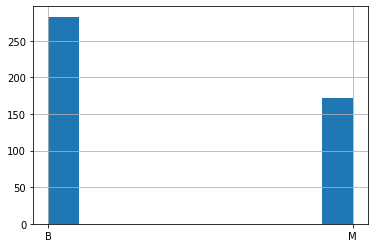

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


predictors = data.columns.drop('diagnosis')
target = "diagnosis"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_sln.hist()
#now you can use train_data, test_data, train_sln, and test_sln

## Exercises:
1. Support Vector Classifier: \\
  a. Default \\
  b. Tuned

In [4]:
from google.colab import drive
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

import matplotlib.pyplot as plt
from itertools import product
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
%matplotlib inline
#Default SVC
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))



accuracy: 0.9824561403508771
     Pred M  Pred B
T M      39       1
T B       1      73


In [5]:
def plot_decision_boundary(data,x_name,y_name,target_name,clf):
    
    #list of the values appearing in the target column
    class_labels = data[target_name].unique()

    #converting from categorical target values to numbers so we can plot them with a contour plot
    target_col_nums = data[target_name].replace(to_replace=class_labels,value=range(len(data[target_name].unique())))

    #create a grid of points representing new cases that we need a prediction for
    #these will serve as the basis for drawing the contours
    x_points = numpy.linspace(data[x_name].min(), data[x_name].max(), 300)
    y_points = numpy.linspace(data[y_name].min(), data[y_name].max(), 300)
    X, Y = numpy.meshgrid(x_points,y_points)

    #train our classifier
    clf.fit(data[[x_name,y_name]],target_col_nums)

    #create the dataframe with all the points in our grid
    plot_points = pd.DataFrame(list(product(x_points,y_points)), columns=[x_name,y_name])

    #get predictions for each point in our grid
    predictions = pd.Series(clf.predict(plot_points))
    
    #predictions will be a big 1D array, so reshape them to 2-dimensions, same as the shape of the grid
    Z = predictions.values.reshape(X.shape)

    #draw the filled-in contours
    plt.contourf(X, Y, Z,cmap=plt.cm.coolwarm)

    #we will plot the training data using a scatter plot, so
    #need to grab the same number of colors used by contourf
    point_colors = plt.cm.coolwarm(numpy.linspace(0,1,len(class_labels)))

    #scatter plot each of the classes in our target column
    for curr_class in range(len(class_labels)):
        curr_subset = data[target_col_nums == curr_class]
        plt.scatter(curr_subset[x_name],curr_subset[y_name],color=point_colors[curr_class],edgecolors='k',label=class_labels[curr_class])
    
    #display the plot and accompanying info
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(str(clf)+'\ntraining set accuracy:'+str(clf.score(data[[x_name,y_name]],target_col_nums)))
    legend = plt.legend(loc='lower right')
    legend.get_frame().set_facecolor('silver')
    plt.show()

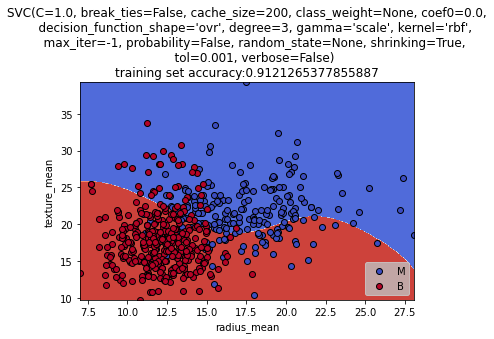

In [6]:
plot_decision_boundary(data, 'radius_mean', 'texture_mean', 'diagnosis', clf)

accuracy: 0.9912280701754386
     Pred M  Pred B
T M      39       1
T B       0      74


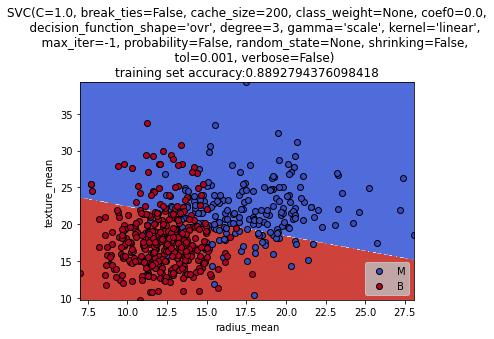

In [7]:
#Tuned SVC:
clf_tuned = SVC(kernel = 'linear', shrinking= False)
clf_tuned.fit(train_data,train_sln)
predictions = clf_tuned.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'radius_mean', 'texture_mean', 'diagnosis', clf_tuned)


2. Perceptron: \\
  a. Default \\
  b. Tuned

accuracy: 0.9824561403508771
     Pred M  Pred B
T M      39       1
T B       1      73


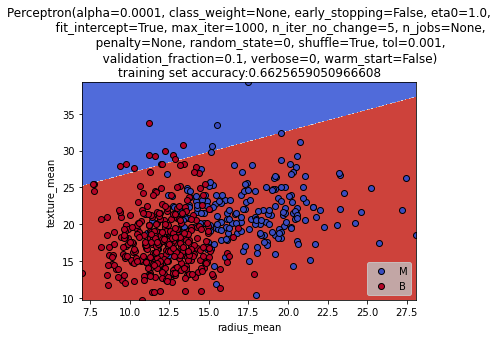

In [8]:
#Default Perceptron
dperc = Perceptron()
dperc.fit(train_data,train_sln)
predictions = dperc.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'radius_mean', 'texture_mean', 'diagnosis', dperc)



accuracy: 0.9912280701754386
     Pred M  Pred B
T M      40       0
T B       1      73


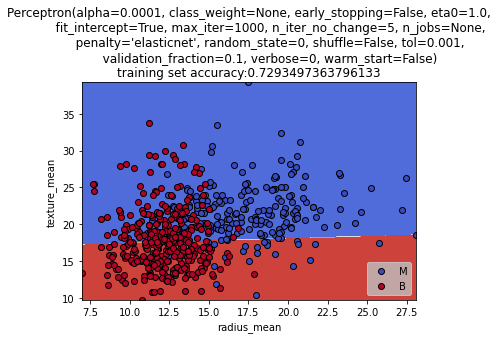

In [9]:
#Tuned Perceptron
tperc = Perceptron(penalty = 'elasticnet', shuffle = False)
tperc.fit(train_data,train_sln)
predictions = tperc.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'radius_mean', 'texture_mean', 'diagnosis', tperc)

3. Stochastic Gradient Descent: \\
  a. Default \\
  b. Tuned

accuracy: 0.9736842105263158
     Pred M  Pred B
T M      39       1
T B       2      72


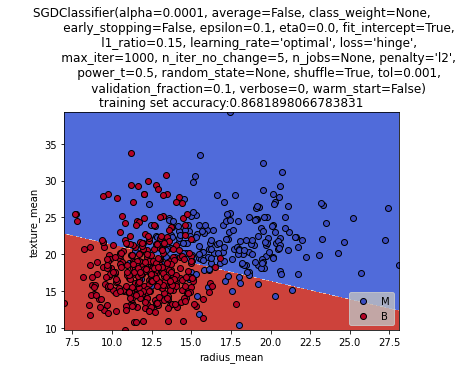

In [10]:
#Default SGD
dsgd = SGDClassifier()
dsgd.fit(train_data,train_sln)
predictions = dsgd.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'radius_mean', 'texture_mean', 'diagnosis', dsgd)

accuracy: 0.9912280701754386
     Pred M  Pred B
T M      40       0
T B       1      73


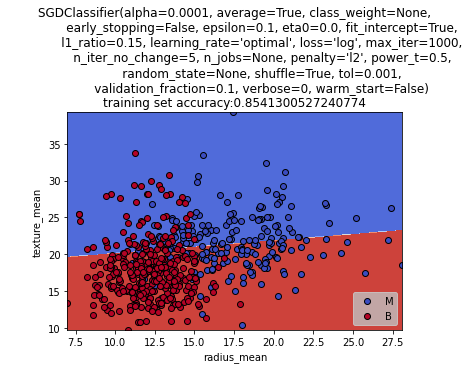

In [42]:
#Tuned SGD
tsgd = SGDClassifier(loss= 'log', average= True)
tsgd.fit(train_data,train_sln)
predictions = tsgd.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'radius_mean', 'texture_mean', 'diagnosis', tsgd)

3. Now take the model that performed the best above and run a **principal component analysis** on it. 

[0.43662428 0.18150759]
accuracy: 0.9736842105263158
     Pred M  Pred B
T M      39       1
T B       2      72


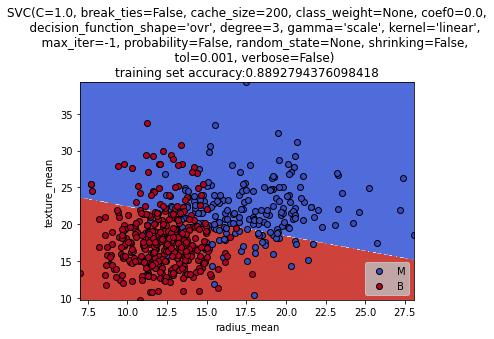

In [44]:
#PCA on best model
# a couple of models all performed with the same accuracy (only getting one wrong), so i'm going to use the tuned SVC.
from sklearn.decomposition import PCA
extractor = PCA(n_components = 2, whiten = True)
extractor.fit(train_data)
print(extractor.explained_variance_ratio_)

train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)

clf_tuned2 = SVC(kernel = 'linear', shrinking= False)
clf_tuned2.fit(train_transformed,train_sln)
predictions2 = clf_tuned2.predict(test_transformed)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions2))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions2, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

plot_decision_boundary(data, 'radius_mean', 'texture_mean', 'diagnosis', clf_tuned2)


## Conclusions:
a. Which model performed the best? Why do you think this model performed the best? \\
b. What effect did the principal component analysis have on the accuracy of your best model? Why do you think this is the case?

Three models performed the best as accuracy goes, but one was better graphically. The top three performers were tuned SVC, tuned SGD, and tuned Perceptron. The best one graphically was tuned SVC. I think it performed the best because this data is pretty well seperated with just a line, and I had the kernel sset to linear. That was also the one that i performed the principal component analysis on. The analysis actually decreased the accuracy of my model. I believe it decreased because it limited the dimensions of the data. Overall, it means it loses data and information so I think that was the cause for the change in accuracy. It was minimal, from .99 to .97. 